In [29]:
# load mdtraj 
import mdtraj as md
import matplotlib.pyplot as plt
import numpy as np

In [8]:
# load pdb file 
pdb_x = md.load('/home/fm1484/comp-class/comp-lab-class/Week7/Input/2w9t.pdb')
pdb_colab = md.load('/home/fm1484/comp-class/comp-lab-class/Week7/Input/2W9T_596c5.result/2W9T_596c5_unrelaxed_rank_1_model_5.pdb')
pdb_alpha_0 = md.load('/home/fm1484/comp-class/comp-lab-class/Week7/Input/rcsb_pdb_2W9T/ranked_0.pdb')
pdb_alpha_1 = md.load('/home/fm1484/comp-class/comp-lab-class/Week7/Input/rcsb_pdb_2W9T/ranked_1.pdb')
pdb_alpha_2 = md.load('/home/fm1484/comp-class/comp-lab-class/Week7/Input/rcsb_pdb_2W9T/ranked_2.pdb')
pdb_alpha_3 = md.load('/home/fm1484/comp-class/comp-lab-class/Week7/Input/rcsb_pdb_2W9T/ranked_3.pdb')
pdb_alpha_4 = md.load('/home/fm1484/comp-class/comp-lab-class/Week7/Input/rcsb_pdb_2W9T/ranked_4.pdb')

In [9]:
# align the two structures using mdtraj based on alpha carbons 
af_0 = pdb_alpha_0.superpose(pdb_x, 0, atom_indices=pdb_x.top.select('name CA'))
af_1 = pdb_alpha_1.superpose(pdb_x, 0, atom_indices=pdb_x.top.select('name CA'))
af_2 = pdb_alpha_2.superpose(pdb_x, 0, atom_indices=pdb_x.top.select('name CA'))
af_3 = pdb_alpha_3.superpose(pdb_x, 0, atom_indices=pdb_x.top.select('name CA'))
af_4 = pdb_alpha_4.superpose(pdb_x, 0, atom_indices=pdb_x.top.select('name CA'))

In [18]:
# compute rmsd of alpha carbons 
rmsd_a0_a = md.rmsd(pdb_x, pdb_alpha_0, 0, atom_indices=pdb_x.top.select('name CA'))
rmsd_a1_a = md.rmsd(pdb_x, pdb_alpha_1, 0, atom_indices=pdb_x.top.select('name CA'))
rmsd_a2_a = md.rmsd(pdb_x, pdb_alpha_2, 0, atom_indices=pdb_x.top.select('name CA'))
rmsd_a3_a = md.rmsd(pdb_x, pdb_alpha_3, 0, atom_indices=pdb_x.top.select('name CA'))
rmsd_a4_a = md.rmsd(pdb_x, pdb_alpha_4, 0, atom_indices=pdb_x.top.select('name CA'))


In [20]:
# compute rmsd for backbone 
rmsd_a0_back = md.rmsd(pdb_x, pdb_alpha_0, 0, atom_indices=pdb_x.top.select('backbone'))
rmsd_a1_back = md.rmsd(pdb_x, pdb_alpha_1, 0, atom_indices=pdb_x.top.select('backbone'))
rmsd_a2_back = md.rmsd(pdb_x, pdb_alpha_2, 0, atom_indices=pdb_x.top.select('backbone'))
rmsd_a3_back = md.rmsd(pdb_x, pdb_alpha_3, 0, atom_indices=pdb_x.top.select('backbone'))
rmsd_a4_back = md.rmsd(pdb_x, pdb_alpha_4, 0, atom_indices=pdb_x.top.select('backbone'))

In [21]:
# compute rmsd for side chain
rmsd_a0_side = md.rmsd(pdb_x, pdb_alpha_0, 0, atom_indices=pdb_x.top.select('sidechain'))
rmsd_a1_side = md.rmsd(pdb_x, pdb_alpha_1, 0, atom_indices=pdb_x.top.select('sidechain'))
rmsd_a2_side = md.rmsd(pdb_x, pdb_alpha_2, 0, atom_indices=pdb_x.top.select('sidechain'))
rmsd_a3_side = md.rmsd(pdb_x, pdb_alpha_3, 0, atom_indices=pdb_x.top.select('sidechain'))
rmsd_a4_side = md.rmsd(pdb_x, pdb_alpha_4, 0, atom_indices=pdb_x.top.select('sidechain'))

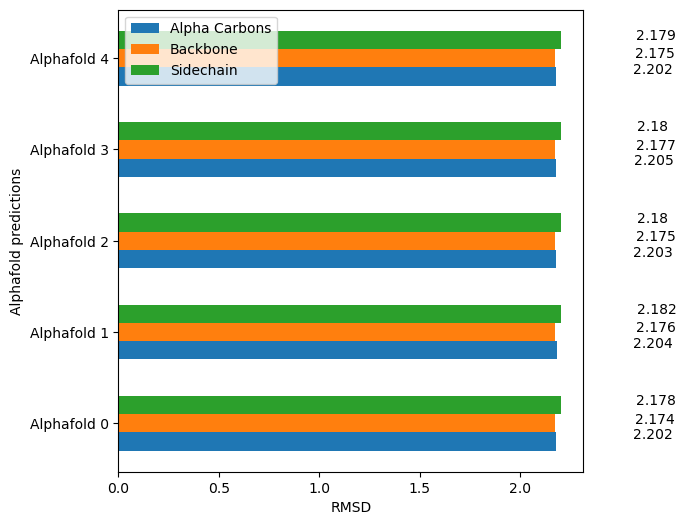

In [114]:
# create a figure
fig, ax = plt.subplots(1, 1, figsize=(6,6))
groups = ['Alphafold 0', 'Alphafold 1', 'Alphafold 2', 'Alphafold 3', 'Alphafold 4']
all_alpha_carbons = [rmsd_a0_a[0], rmsd_a1_a[0], rmsd_a2_a[0], rmsd_a3_a[0], rmsd_a4_a[0]]
all_backbone = [rmsd_a0_back[0], rmsd_a1_back[0], rmsd_a2_back[0], rmsd_a3_back[0], rmsd_a4_back[0]]
all_sidechain = [rmsd_a0_side[0], rmsd_a1_side[0], rmsd_a2_side[0], rmsd_a3_side[0], rmsd_a4_side[0]]
X_axis = np.arange(len(groups))
plt.barh(X_axis - 0.2, all_alpha_carbons, 0.2, label = 'Alpha Carbons')
plt.barh(X_axis, all_backbone, 0.2, label = 'Backbone')
plt.barh(X_axis + 0.2, all_sidechain, 0.2, label = 'Sidechain')
plt.yticks(X_axis, groups)
plt.xlabel("RMSD")
plt.ylabel('Alphafold predictions')
plt.legend(loc = 'upper left')
for i, value in enumerate(all_alpha_carbons):
    ax.text(value + 0.4, i + 0.2, str(round(value, 3)))
for j, value in enumerate(all_backbone):
    ax.text(value + 0.4, j, str(round(value, 3)))
for k, value in enumerate(all_sidechain):
    ax.text(value + 0.36, k - 0.17, str(round(value, 3)))
# save the figure
plt.savefig('rmsd.png', dpi=500, bbox_inches='tight')